In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

#### Data Preprocessing: 

In [2]:
# load the data
data = pd.read_excel('/DataScienceNotes/Assignments/15-Clustring/EastWestAirlines.xlsx', sheet_name='data')

In [3]:
# load first few rows of the data
data.head()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1


In [4]:
# get the feature informations
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [5]:
# getting numerical columns min, max, mean, &std 
data.describe()

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
count,3999.000000,3.999000e+03,3999.000000,3999.000000,3999.000000,3999.000000,3999.000000,3999.00000,3999.000000,3999.000000,3999.00000,3999.000000
mean,2014.819455,7.360133e+04,144.114529,2.059515,1.014504,1.012253,17144.846212,11.60190,460.055764,1.373593,4118.55939,0.370343
std,1160.764358,1.007757e+05,773.663804,1.376919,0.147650,0.195241,24150.967826,9.60381,1400.209171,3.793172,2065.13454,0.482957
min,1.000000,0.000000e+00,0.000000,1.000000,1.000000,1.000000,0.000000,0.00000,0.000000,0.000000,2.00000,0.000000
25%,1010.500000,1.852750e+04,0.000000,1.000000,1.000000,1.000000,1250.000000,3.00000,0.000000,0.000000,2330.00000,0.000000
50%,2016.000000,4.309700e+04,0.000000,1.000000,1.000000,1.000000,7171.000000,12.00000,0.000000,0.000000,4096.00000,0.000000
75%,3020.500000,9.240400e+04,0.000000,3.000000,1.000000,1.000000,23800.500000,17.00000,311.000000,1.000000,5790.50000,1.000000
max,4021.000000,1.704838e+06,11148.000000,5.000000,3.000000,5.000000,263685.000000,86.00000,30817.000000,53.000000,8296.00000,1.000000


In [6]:
# checking null values
data.isna().sum()

ID#                  0
Balance              0
Qual_miles           0
cc1_miles            0
cc2_miles            0
cc3_miles            0
Bonus_miles          0
Bonus_trans          0
Flight_miles_12mo    0
Flight_trans_12      0
Days_since_enroll    0
Award?               0
dtype: int64

In [7]:
# finding zeros in columns also checking the columns having valid zeros or not
(data == 0).sum()

ID#                     0
Balance                 1
Qual_miles           3773
cc1_miles               0
cc2_miles               0
cc3_miles               0
Bonus_miles           475
Bonus_trans           475
Flight_miles_12mo    2723
Flight_trans_12      2723
Days_since_enroll       0
Award?               2518
dtype: int64

#### These are the valid zero's in the columns no such column should be replace with median

#### there is no categorical data not required to do any encodeing

<Figure size 800x600 with 0 Axes>

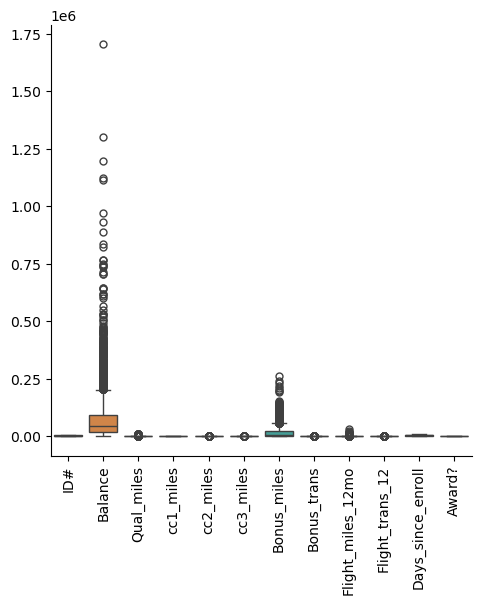

In [8]:
# finding outliers
plt.figure(figsize=(8, 6))
sns.catplot(data, kind='box')
plt.xticks(rotation=90)
plt.show()

Balance and Bonus_miles are having outliers

In [9]:
# scaling the data since the clustering is distane based so
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

Scaling will prevents the large scale variables from dominating

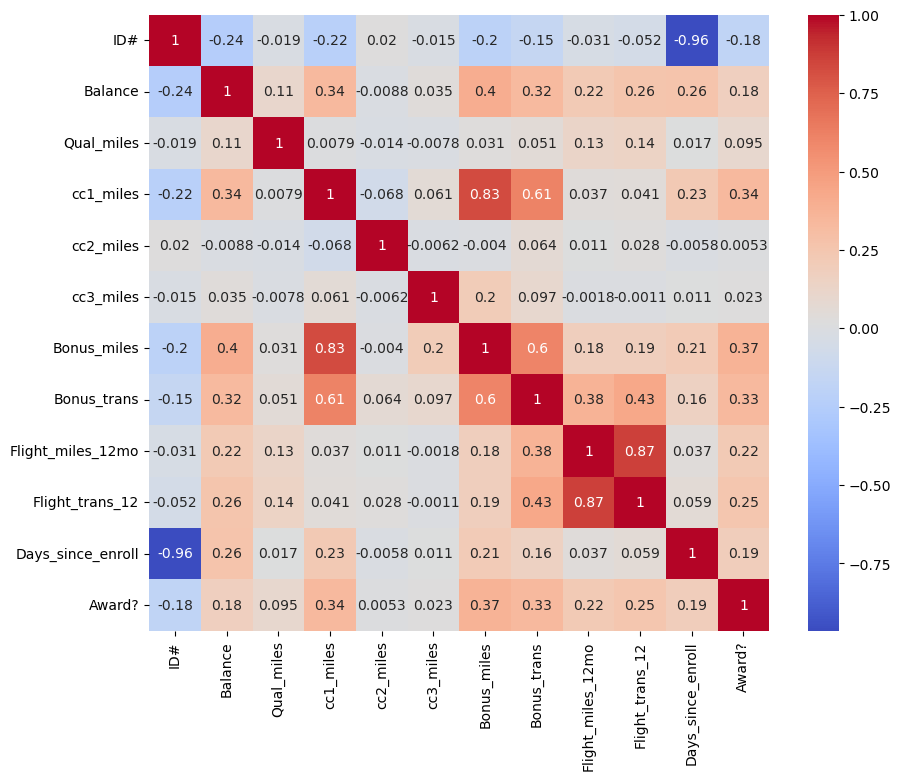

In [10]:
# checking correlation between the features
plt.figure(figsize=(10,8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.show()

there is strong correlation between Bouns_miles, Bonus_trans and cc1_miles

In [11]:
# KMeans clustering using Elbow method
from sklearn.cluster import KMeans, DBSCAN
inertia = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit_transform(scaled_data)
    inertia.append(kmeans.inertia_)

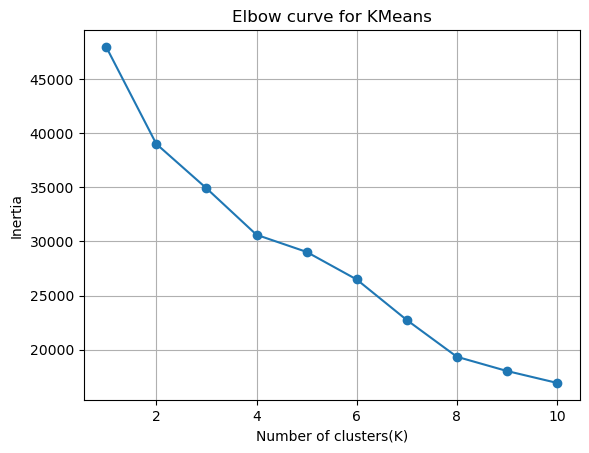

In [12]:
# scree plot 
# determining optimal number of components 
plt.plot(range(1,11), inertia, marker='o')
plt.xlabel('Number of clusters(K)')
plt.ylabel('Inertia')
plt.title('Elbow curve for KMeans')
plt.grid()
plt.show()

here Elbow appears around k=3 or 4 

chosing k=3

In [13]:
# Applying KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans_label = kmeans.fit_predict(scaled_data)
data['KMeans-Cluster'] = kmeans_label

In [14]:
# evaluating the cluster 
from sklearn.metrics import silhouette_score
kmeans_silht = silhouette_score(scaled_data, kmeans_label)
kmeans_silht

0.201891717665419

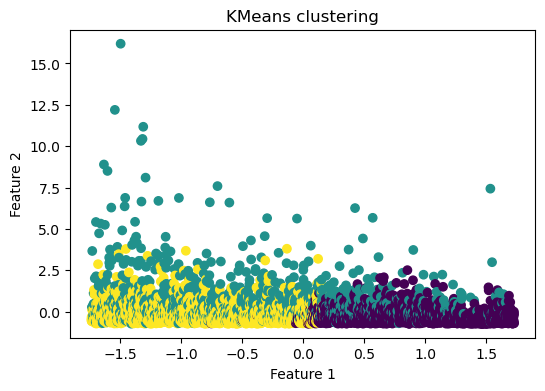

In [15]:
# visalization of clusters
plt.figure(figsize= (6, 4))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=kmeans_label, cmap='viridis')
plt.title('KMeans clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

clusters are not clearly seprated but shown some clarity on data

In [16]:
# applying DBSCAN
dbscan = DBSCAN(eps=1.2, min_samples=5)
dbscan_label = dbscan.fit_predict(scaled_data)
data['DBSCAN_Cluster'] = dbscan_label

In [17]:
data['DBSCAN_Cluster'].value_counts()

 0    2351
 1    1134
-1     488
 2      14
 3      12
Name: DBSCAN_Cluster, dtype: int64

here -1 represents the noise/ouliers

DBSCAN that automatically detect noise points

In [18]:
# evaluate the cluster using silhoutte score
mask = dbscan_label != -1
dbscan_silht = silhouette_score(scaled_data[mask], dbscan_label[mask])
dbscan_silht

0.23700666640348614

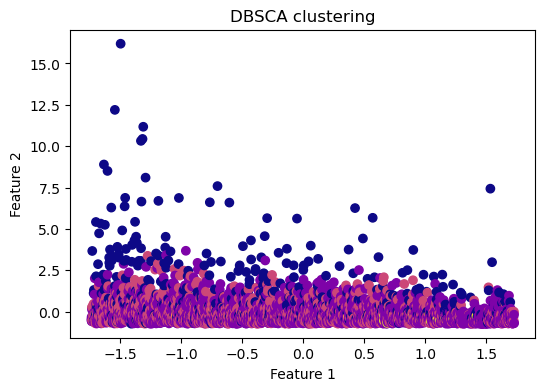

In [19]:
# visualization of dbscan
plt.figure(figsize= (6, 4))
plt.scatter(scaled_data[:, 0], scaled_data[:, 1], c=dbscan_label, cmap='plasma')
plt.title('DBSCA clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.show()

### Cluster Analysis and Interpretation: 

KMeans 

cluster 0 is high millege and frequent flyers means that the loyl customers

cluster 1 is moderate activity means regular tavellers 

cluster 2 is low balance and activity means the occasional customers

DBSCAN

It indentifies the dense customer group and separates outliers

more robust to noise than the kmeans

KMeans have clear segmentation where as DBSCAN will detect noise and outliers  